## Data Preprocessing

In [122]:
# module import
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [124]:
df.drop(columns=['student_id'], inplace=True)

In [125]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## EDA - Exploratory Data Analysis

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [127]:
df.shape

(1000, 15)

In [128]:
df.isnull().sum()

age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [129]:
df.dropna(subset=['parental_education_level'], inplace=True)

In [130]:
# Checking for Outliers using IQR for each numeric column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {col}:\n", outliers)

Outliers in age:
 Empty DataFrame
Columns: [age, gender, study_hours_per_day, social_media_hours, netflix_hours, part_time_job, attendance_percentage, sleep_hours, diet_quality, exercise_frequency, parental_education_level, internet_quality, mental_health_rating, extracurricular_participation, exam_score]
Index: []
Outliers in study_hours_per_day:
      age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
455   19    Male                  8.3                 3.3            2.6   
797   23    Male                  8.2                 2.2            1.5   
875   19  Female                  7.6                 3.0            2.9   

    part_time_job  attendance_percentage  sleep_hours diet_quality  \
455           Yes                   86.6          6.5         Fair   
797            No                   83.1          5.7         Poor   
875            No                   99.4          4.8         Poor   

     exercise_frequency parental_education_level internet_quali

In [131]:
# Categorical Columns

for col in df.select_dtypes(include=['object']).columns:
    print('{col}: ', df[col].value_counts())

{col}:  gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
{col}:  part_time_job
No     713
Yes    196
Name: count, dtype: int64
{col}:  diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
{col}:  parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
{col}:  internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
{col}:  extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


only 'extracurricular_participation' and 'part_time_job' have yes-no values so we can label encode them and use custom mapping for others so that we know what the values refer to

In [132]:
# Label Encoding for the Categorical Features
# Categorical Features - gender, part_time_job, diet_quality, parental_education_level, internet_quality, extracurricular_participation 
le = LabelEncoder()
for cols in ['part_time_job', 'extracurricular_participation']:
    df[cols] = le.fit_transform(df[cols])


gender_mapping = {'Female': 0, 'Male': 1, 'Other': 0.5}
df['gender'] = df['gender'].map(gender_mapping)

diet_mapping = {'Poor': 0, 'Fair': 0.5, 'Good': 1}
df['diet_quality'] = df['diet_quality'].map(diet_mapping)

p_edu_mapping = {'High School': 0, 'Bachelor': 0.5, 'Master': 1}
df['parental_education_level'] = df['parental_education_level'].map(p_edu_mapping)

internet_mapping = {'Poor': 0, 'Average': 0.5, 'Good': 1}
df['internet_quality'] = df['internet_quality'].map(internet_mapping)
df.head(5)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0.0,0.0,1.2,1.1,0,85.0,8.0,0.5,6,1.0,0.5,8,1,56.2
1,20,0.0,6.9,2.8,2.3,0,97.3,4.6,1.0,6,0.0,0.5,8,0,100.0
2,21,1.0,1.4,3.1,1.3,0,94.8,8.0,0.0,1,0.0,0.0,1,0,34.3
3,23,0.0,1.0,3.9,1.0,0,71.0,9.2,0.0,4,1.0,1.0,1,1,26.8
4,19,0.0,5.0,4.4,0.5,0,90.9,4.9,0.5,3,1.0,1.0,1,0,66.4


In [133]:
features = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'attendance_percentage', 'sleep_hours', 'social_media_hours', 'netflix_hours']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

## Data Exploration

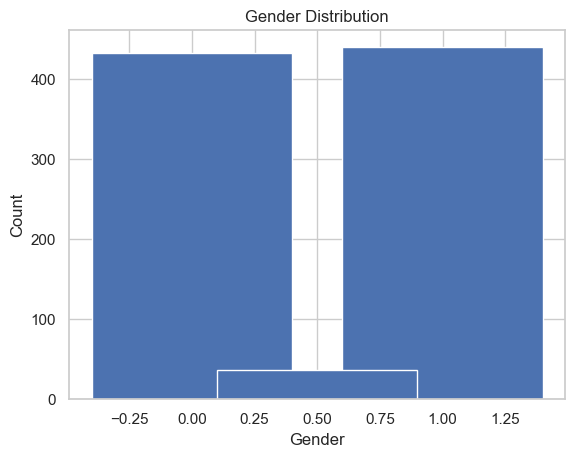

In [134]:
# Gender Distribution in the dataset
gender_counts = df.gender.value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

### Univariate Analysis

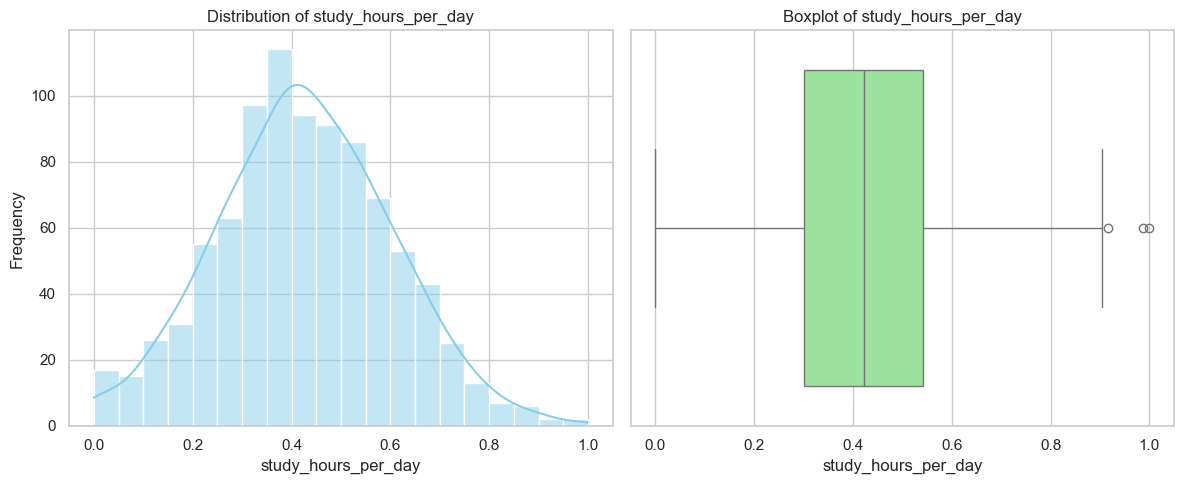

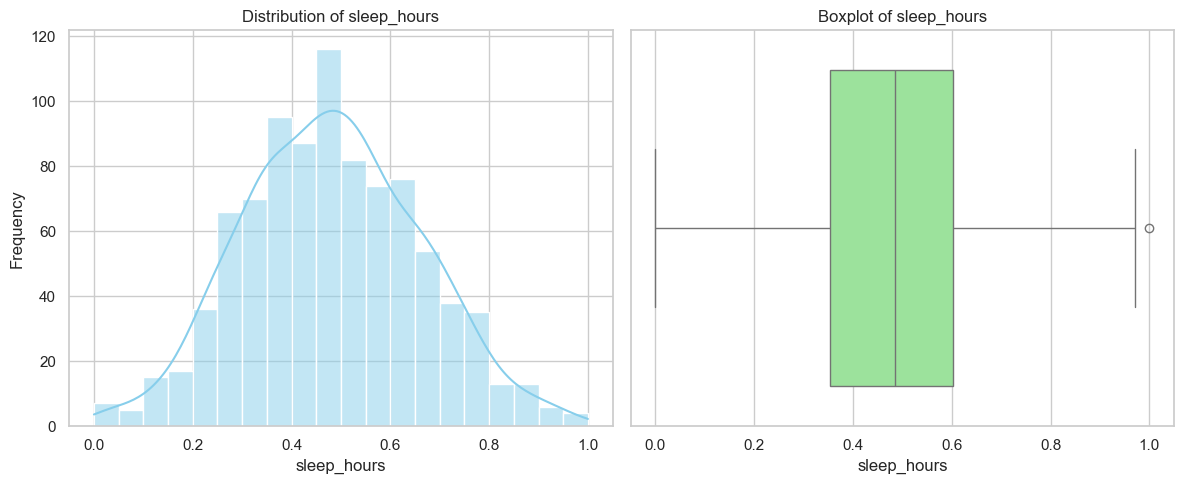

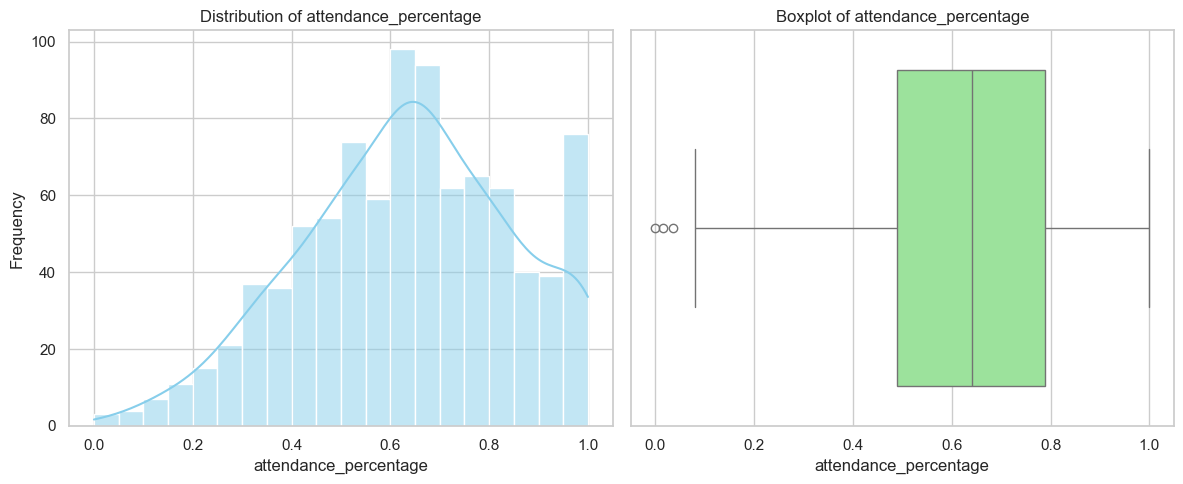

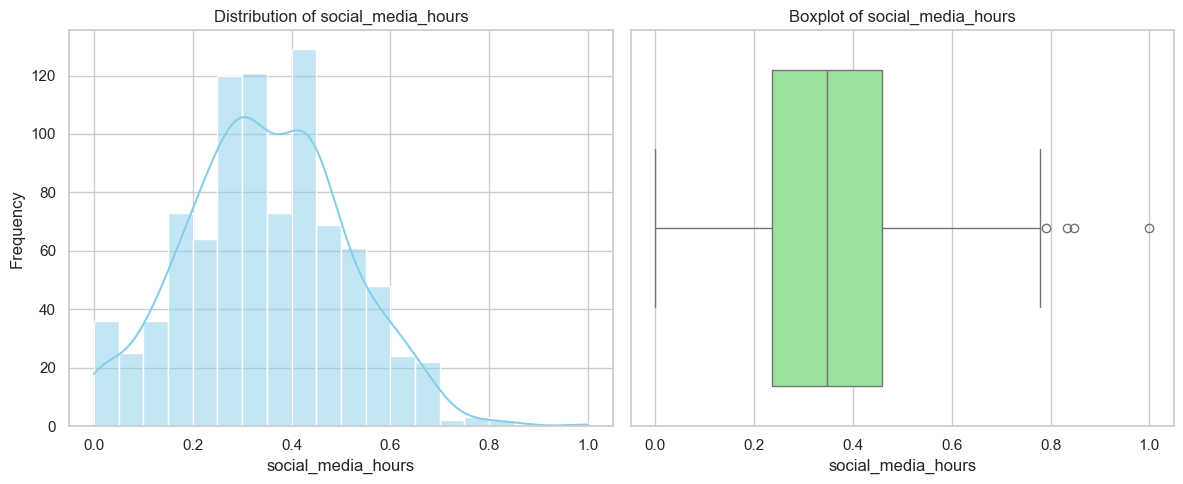

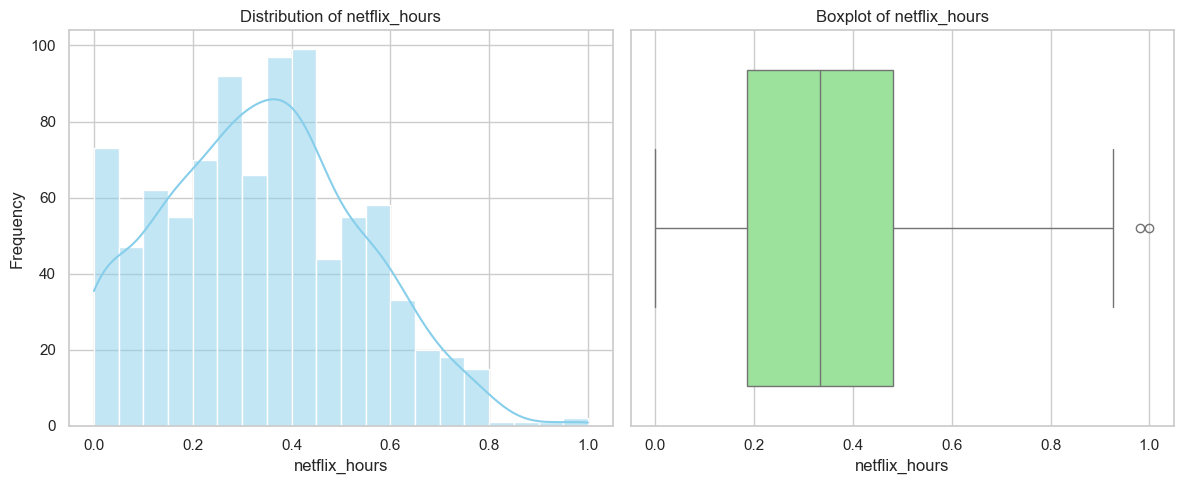

In [135]:
habit_columns = ['study_hours_per_day', 'sleep_hours', 'attendance_percentage', 'social_media_hours', 'netflix_hours']

for col in habit_columns:
    plt.figure(figsize=(12, 5))

    # plotting histogram with KDE
    # kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


data distribution is quite normal across 'study_hours_per_day', 'sleep_hours'

'attendance_percentage' is left skewed. Few outliers are present who have very less attendance.

both 'social_media_hours' and 'netflix_hours' are right skewed with a few individuals having extremely high social media and netflix hours.

### Bivariate Analysis

In [136]:
corr_matrix = df.corr()

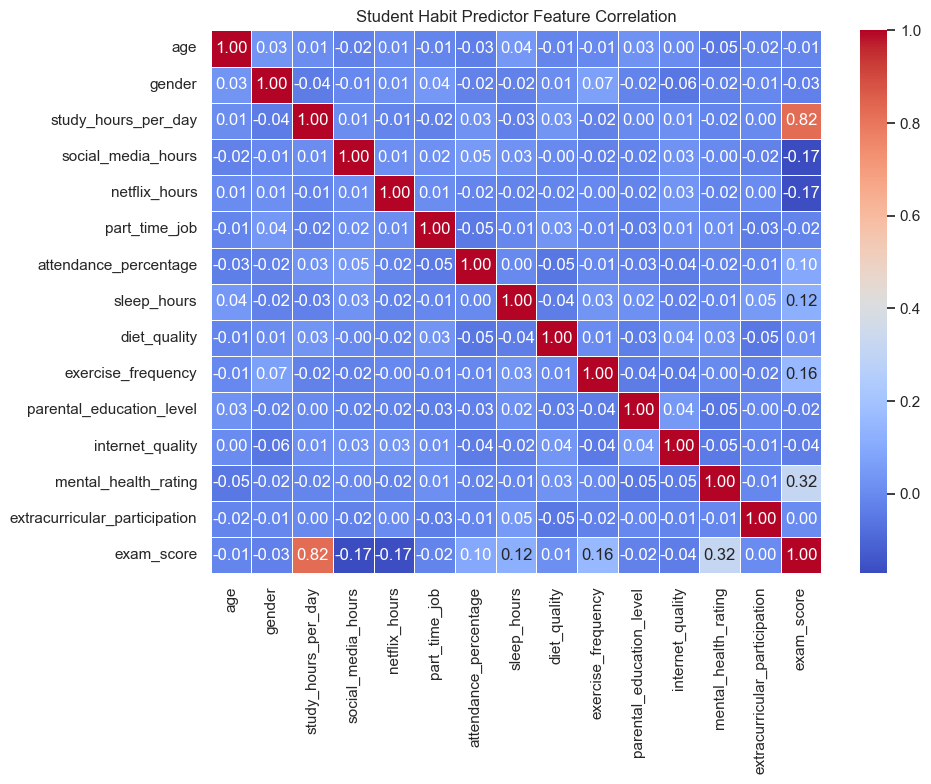

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Student Habit Predictor Feature Correlation")
plt.tight_layout()
plt.show()

### Correlation Matrix Observations

1. exam_score and study_hours_per_day show the highest positive correlation (0.82)
2. exam_score and mental_health_rating show a positive correlation (0.32)
3. other notable positive but mild correlations of exam_score is with :

 - attendance_percentage - 0.12 (attending more classes could help with better understanding of concepts)

 - sleep_hours - 0.12 (proper rest helps but effect alone might be too weak)

 - diet_quality - 0.10

4. notable negative but mild correlations of exam_score is with :

- social_media_hours - -0.17 (more scrolling = worse performance)

- netflix_hours - -0.17 (higher entertainment usage linked to lower scores)


Therefore, we can use the top positive correlations for habit improvement suggestions

top negative correlations to warn the students against

and both types of correlations to classify the students into a specific cluster

## Visualizing top correlated features
Creating scatterplots with regression lines to visually confirm our correlation heatmap findings


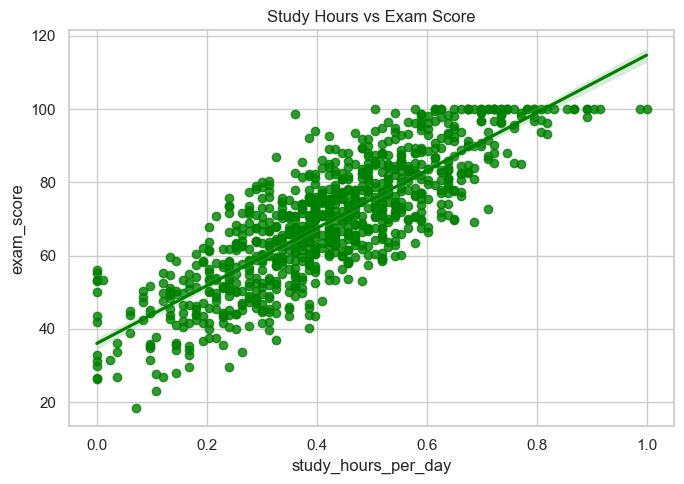

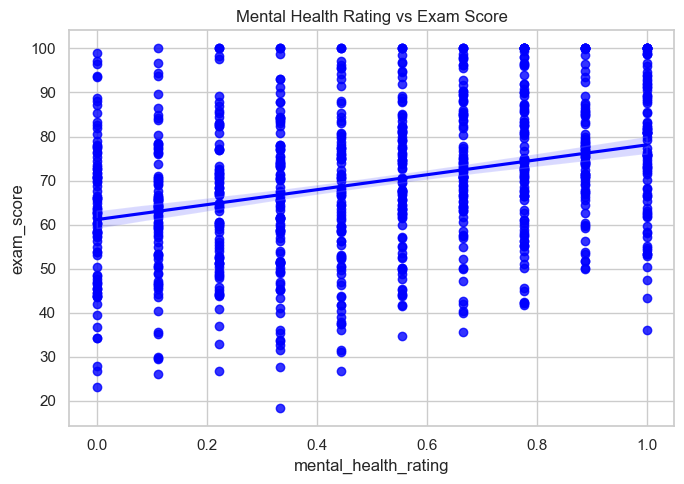

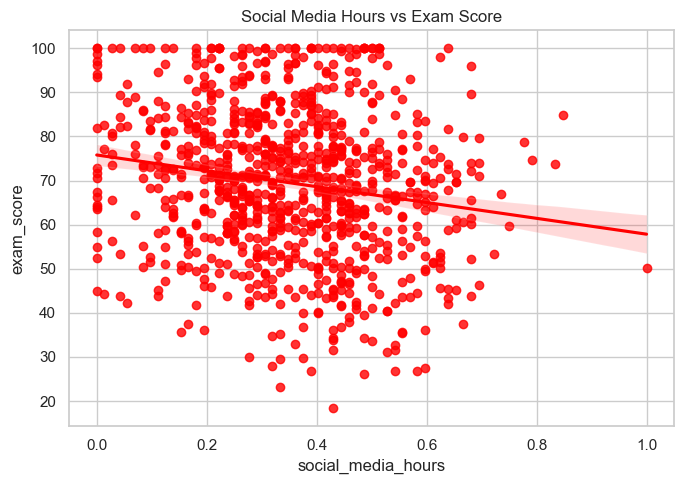

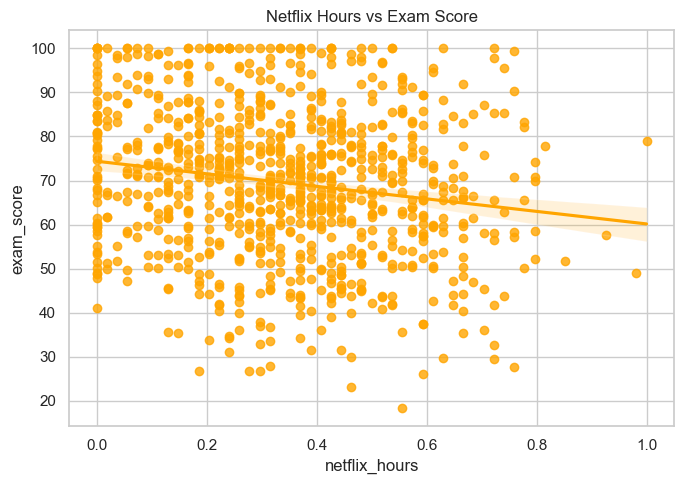

In [138]:
sns.set(style="whitegrid")


# Study Hours vs Exam Score
plt.figure(figsize=(7, 5))
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, color='green')
plt.title("Study Hours vs Exam Score")
plt.tight_layout()
plt.show()

# Mental Health Rating vs Exam Score
plt.figure(figsize=(7, 5))
sns.regplot(x='mental_health_rating', y='exam_score', data=df, color='blue')
plt.title("Mental Health Rating vs Exam Score")
plt.tight_layout()
plt.show()

# Social Media Hours vs Exam Score
plt.figure(figsize=(7, 5))
sns.regplot(x='social_media_hours', y='exam_score', data=df, color='red')
plt.title("Social Media Hours vs Exam Score")
plt.tight_layout()
plt.show()

# Netflix Hours vs Exam Score
plt.figure(figsize=(7, 5))
sns.regplot(x='netflix_hours', y='exam_score', data=df, color='orange')
plt.title("Netflix Hours vs Exam Score")
plt.tight_layout()
plt.show()

a lot of scatter in social_media_hours and netflix_hours suggest that there are students who manage to score well even after high social media and netflix usage.

# Clustering Model

## Model Training

In [139]:
features = [
    'study_hours_per_day',
    'mental_health_rating',
    'exercise_frequency',
    'attendance_percentage',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours'
]


In [140]:
X = df[features]
y = df.exam_score

### KMeans

In [141]:
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, clusters)
    print(f"For k={k}: {score}")

For k=2: 0.2024772085824291
For k=3: 0.18224416292519996
For k=4: 0.17301043148599696
For k=5: 0.15588495764981347


In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters

In [143]:
df.head(5)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,cluster
0,23,0.0,0.000000,0.166667,0.203704,0,0.659091,0.705882,0.5,1.000000,1.0,0.5,0.777778,1,56.2,2
1,20,0.0,0.831325,0.388889,0.425926,0,0.938636,0.205882,1.0,1.000000,0.0,0.5,0.777778,0,100.0,2
2,21,1.0,0.168675,0.430556,0.240741,0,0.881818,0.705882,0.0,0.166667,0.0,0.0,0.000000,0,34.3,0
3,23,0.0,0.120482,0.541667,0.185185,0,0.340909,0.882353,0.0,0.666667,1.0,1.0,0.000000,1,26.8,1
4,19,0.0,0.602410,0.611111,0.092593,0,0.793182,0.250000,0.5,0.500000,1.0,1.0,0.000000,0,66.4,1


In [144]:
df.groupby('cluster')['exam_score'].mean()

cluster
0    65.374048
1    66.556856
2    76.120872
Name: exam_score, dtype: float64

In [145]:
# View cluster-wise mean of key features
cluster_summary = df.groupby('cluster')[features + ['exam_score']].mean().round(2)
print(cluster_summary)

         study_hours_per_day  mental_health_rating  exercise_frequency  \
cluster                                                                  
0                       0.44                  0.38                0.14   
1                       0.41                  0.26                0.78   
2                       0.42                  0.83                0.60   

         attendance_percentage  sleep_hours  social_media_hours  \
cluster                                                           
0                         0.64         0.48                0.36   
1                         0.63         0.48                0.35   
2                         0.63         0.48                0.34   

         netflix_hours  exam_score  
cluster                             
0                 0.33       65.37  
1                 0.35       66.56  
2                 0.34       76.12  


/var/folders/l3/pmg4cvxx44zf04tfw2tkhsq00000gn/T/ipykernel_54099/340590764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='exam_score', data=df, errorbar=None, palette='Set2')


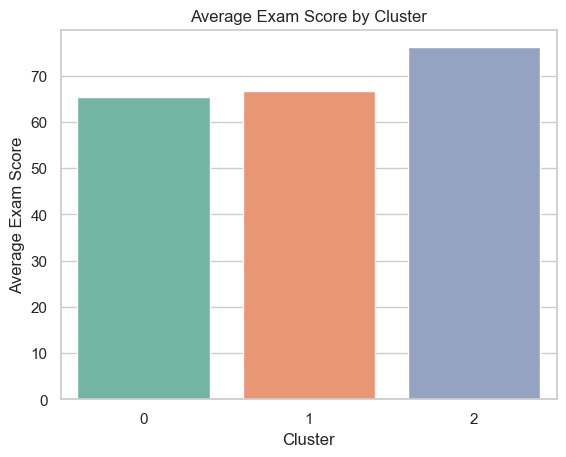

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='cluster', y='exam_score', data=df, errorbar=None, palette='Set2')
plt.title('Average Exam Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Exam Score')
plt.show()

| Cluster | Label                    | Description                                                                             |
| ------- | ------------------------ | --------------------------------------------------------------------------------------- |
| **0**   | `Stressed Minimalists`   | Low mental health & activity, average habits otherwise. Need holistic improvement.      |
| **1**   | `Disengaged Energizers`  | Physically active but poor mental health, moderate performance. Need support/structure. |
| **2**   | `Well-Rounded Achievers` | Strong mental health, moderate screen time, decent habits. High-performing group.       |


In [147]:
cluster_labels = {
    0: "Stressed Minimalists",
    1: "Disengaged Energizers",
    2: "Well-Rounded Achievers"
    }

df['cluster_label'] = df['cluster'].map(cluster_labels)
df.head(5)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,cluster,cluster_label
0,23,0.0,0.000000,0.166667,0.203704,0,0.659091,0.705882,0.5,1.000000,1.0,0.5,0.777778,1,56.2,2,Well-Rounded Achievers
1,20,0.0,0.831325,0.388889,0.425926,0,0.938636,0.205882,1.0,1.000000,0.0,0.5,0.777778,0,100.0,2,Well-Rounded Achievers
2,21,1.0,0.168675,0.430556,0.240741,0,0.881818,0.705882,0.0,0.166667,0.0,0.0,0.000000,0,34.3,0,Stressed Minimalists
3,23,0.0,0.120482,0.541667,0.185185,0,0.340909,0.882353,0.0,0.666667,1.0,1.0,0.000000,1,26.8,1,Disengaged Energizers
4,19,0.0,0.602410,0.611111,0.092593,0,0.793182,0.250000,0.5,0.500000,1.0,1.0,0.000000,0,66.4,1,Disengaged Energizers


In [148]:
# Silhouette Score

from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['cluster'])
print("Silhouette Score: ", round(score, 3))

Silhouette Score:  0.182


Silhouette Score:  0.182 suggests that the data is not random and some structure is there but it is overlapping which is generally the case with human behaviour data.

In [149]:
import joblib

# saving the model
joblib.dump(kmeans, 'kmeans_model.pkl')

# saving the minmax scaler for the numerical columns
joblib.dump(scaler, 'scaler.pkl')

joblib.dump(df, 'dataframe.pkl')
# not saving the label encoder or mappings since the label encoded columns are not used for the project


['dataframe.pkl']

In [153]:
df1 = df.copy()

In [156]:
features = [
 'study_hours_per_day',
 'mental_health_rating',
 'exercise_frequency',
 'attendance_percentage',
 'sleep_hours',
 'social_media_hours',
 'netflix_hours'
 ]

df1[features] = scaler.inverse_transform(df1[features])

In [158]:
cluster_means = df1.groupby('cluster')[[
 'study_hours_per_day',
 'mental_health_rating',
 'exercise_frequency',
 'attendance_percentage',
 'sleep_hours',
 'social_media_hours',
 'netflix_hours'
 ]].mean()

cluster_means.to_csv('cluster_means.csv')